# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        norm = np.linalg.norm(X @ w - y)
        return (1 / n_objects) * (norm ** 2)


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        return (2 / n_objects) * (X.T @ (X @ w - y))

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483.,
                                                      1199584., 1208685., 1217786., 1226887.,
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    history = [w_init]

    for i in range(n_iterations):

        if i == 0: w = w_init

        w = w - lr * loss.calc_grad(X, y, w)
        history.append(w)

    return history

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045025
0.8670644395649495


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss,
            lr_lbl: str = None, batch_lbl: str = None, p_lbl: str = None):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list[1:])

    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))

    plt.title('GD trajectory (starts with t=1)')
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')

    plt.xlim(w_list[:, 0].min() - 0.1,
             w_list[:, 0].max() + 0.1)

    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)

    plt.annotate(lr_lbl, xy=(w_list[0, 0] + 0.015, w_list[0, 1] + 0.015),
                 bbox=dict(boxstyle="round", fc="w"), color='r')

    plt.annotate(batch_lbl, xy=(w_list[:, 0].min(), w_list[:, 1].max()),
                 bbox=dict(boxstyle="round", fc="w"), color='r')

    plt.annotate(p_lbl, xy=(w_list[:, 0].min(), w_list[:, 1].min()),
                 bbox=dict(boxstyle="round", fc="w"), color='r')

    plt.gca().set_aspect('auto')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

In [9]:
import warnings
warnings.filterwarnings('ignore')

Заметим, что чем менее кольца "сплющенны", тем более крутой спуск от `w_init` мы наблюдаем.

Для `lr` $= 0.001$ спуск гладкий: точки траектории находятся близко друг к другу, линия траектории ровная.

Для `lr` от $0.002$ до $0.006$ начальные точки всё больше отступают друг от друга, видим, что линия траектории в начале превращается в ломаную.

На `lr` $= 0.008$ начинаются колебания. Они становятся более резкими для `lr` $= 0.01$ и утихают практически в центре.

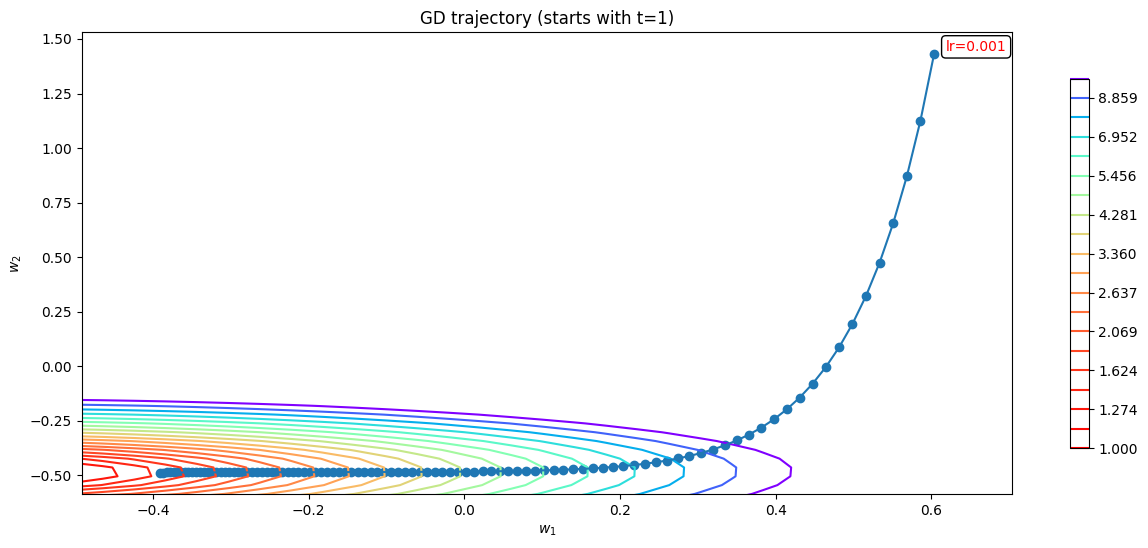

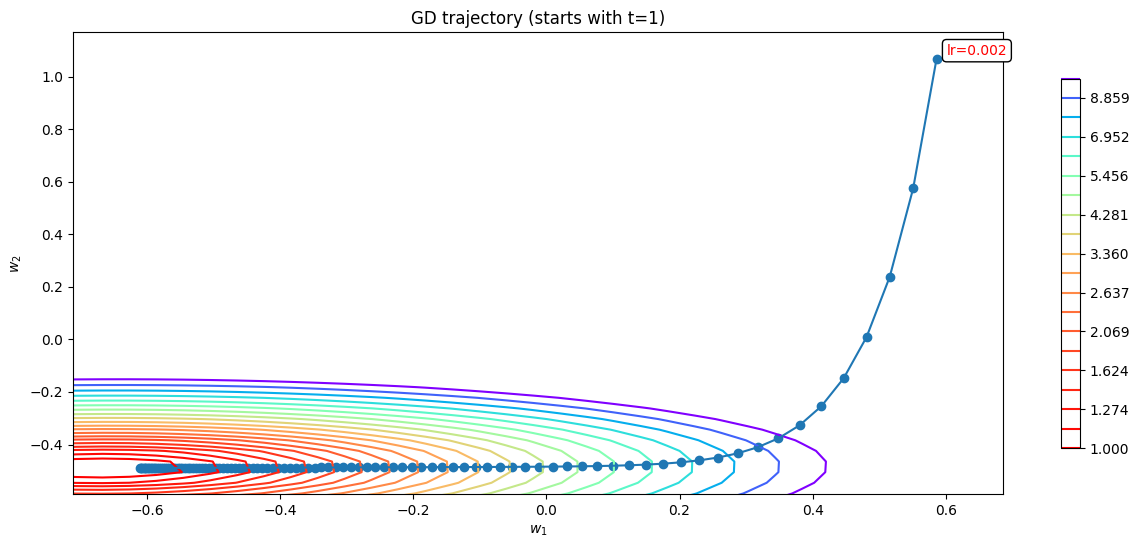

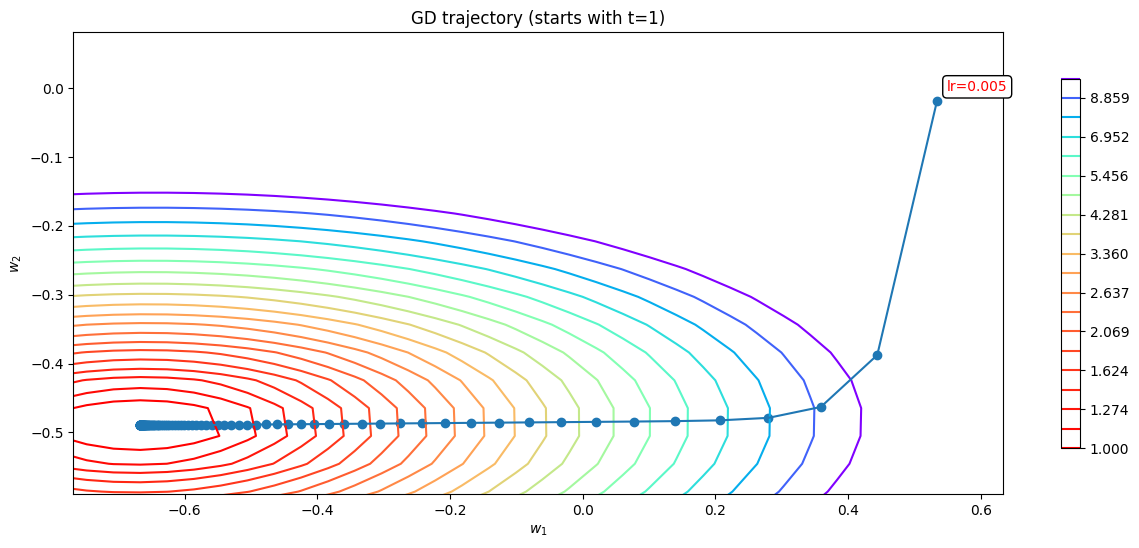

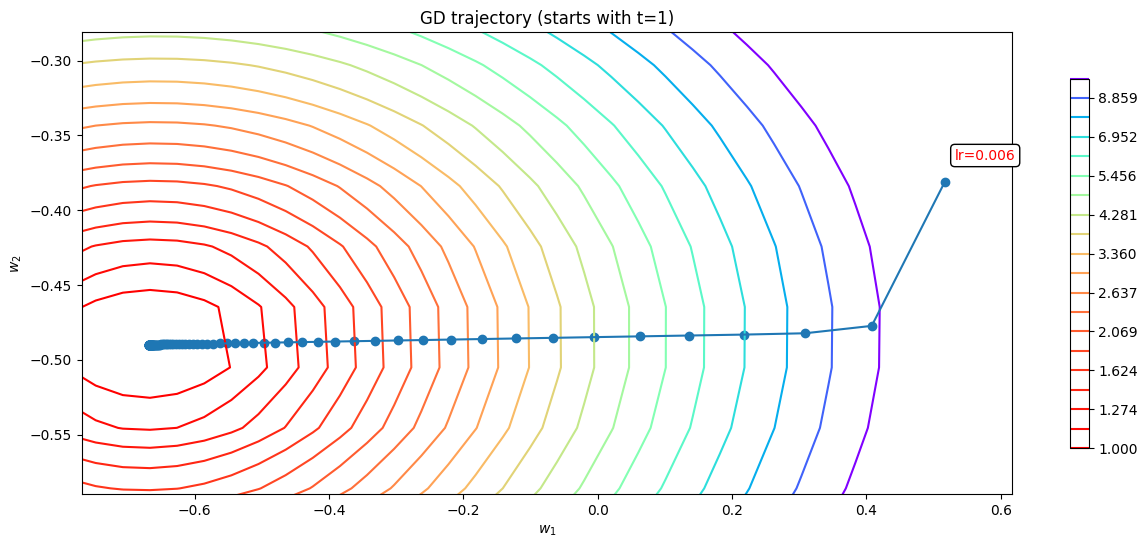

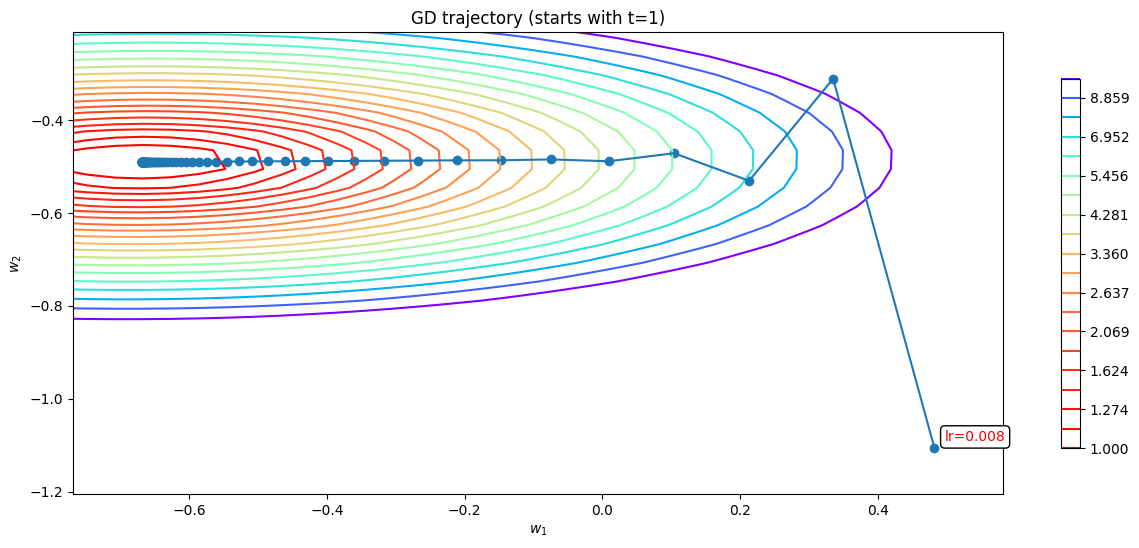

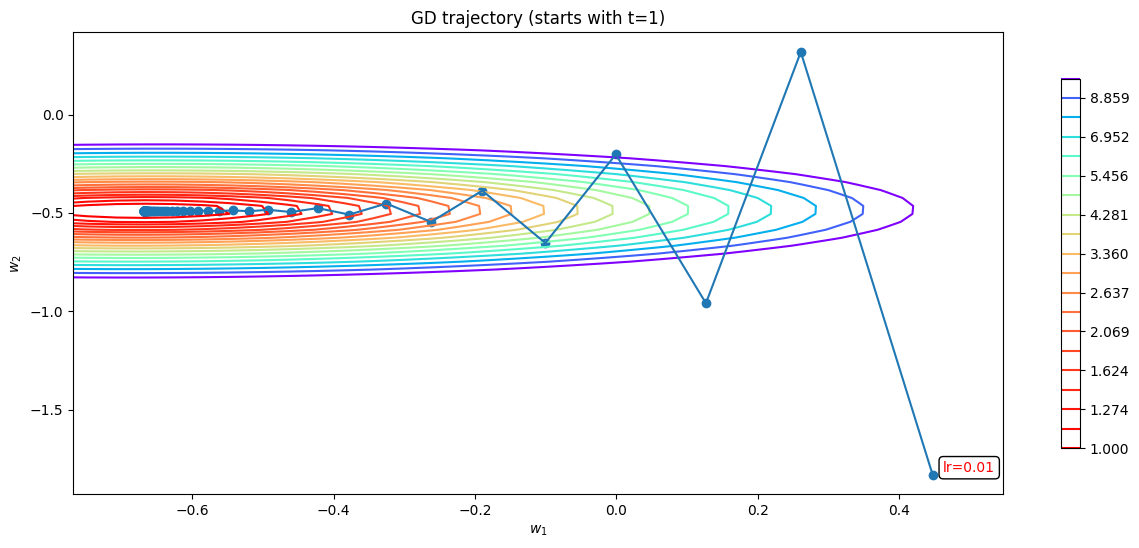

In [10]:
for lr, lr_label in zip([0.001, 0.002, 0.005, 0.006, 0.008, 0.01],
                        ['lr=0.001', 'lr=0.002', 'lr=0.005', 'lr=0.006', 'lr=0.008', 'lr=0.01']):
    plot_gd(gradient_descent(w_init, X, y, loss, lr, 100), X, y, loss, lr_label)

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    history = [w_init]

    for i in range(n_iterations):

        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)

        batch = X[batch_indices]
        y_batch = y[batch_indices]

        if i == 0: w = w_init

        w = w - lr * loss.calc_grad(batch, y_batch, w)
        history.append(w)

    return history

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Параметр `lr` влияет на резкость спуска, параметр `batch_size` $-$ на колебание линии траектории ближе к центру. По графикам видно, что стохастический градиентный спуск более "колеблющийся", чем обычный.

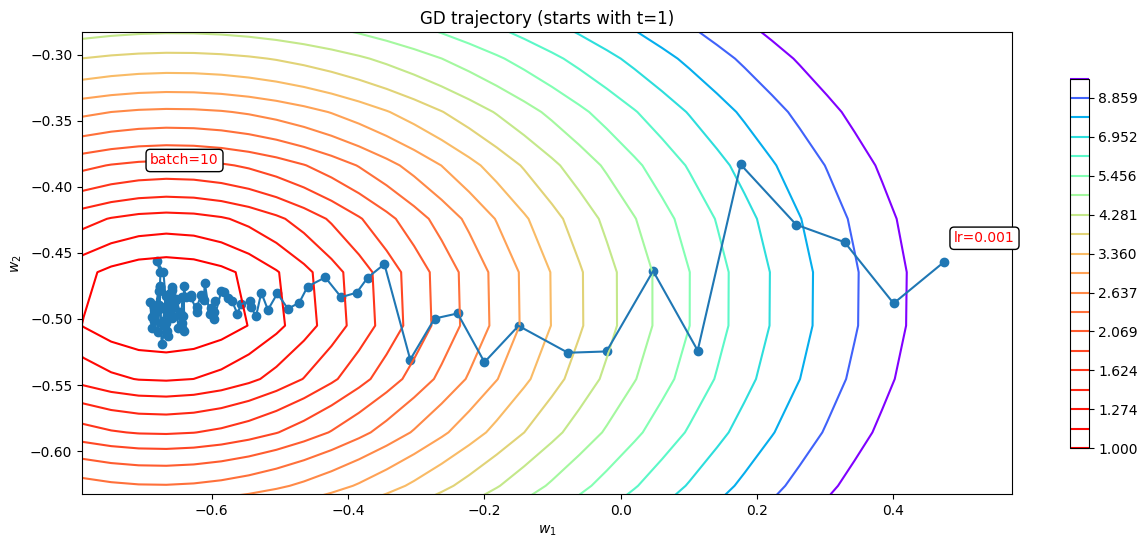

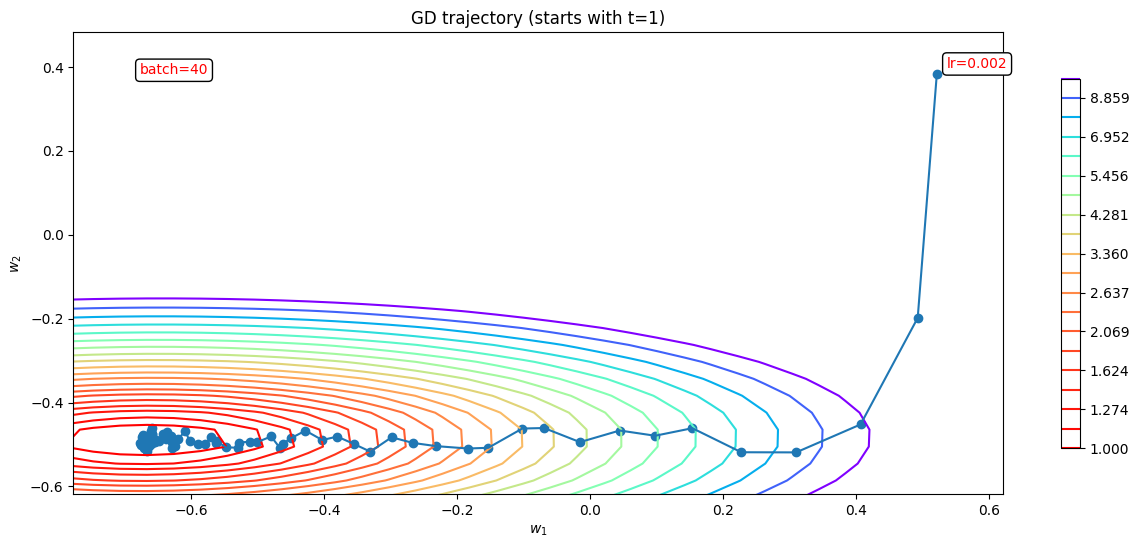

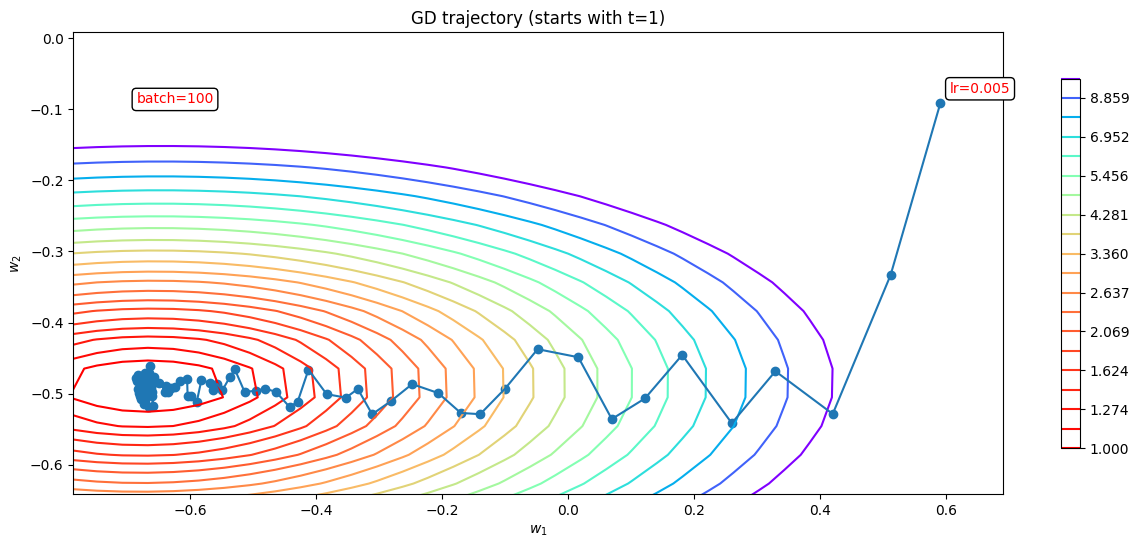

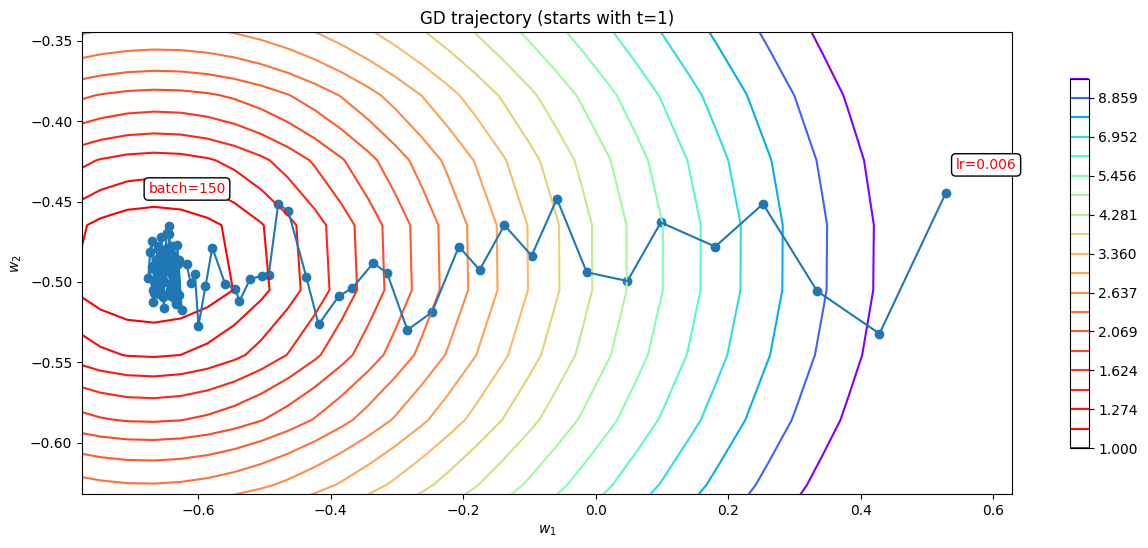

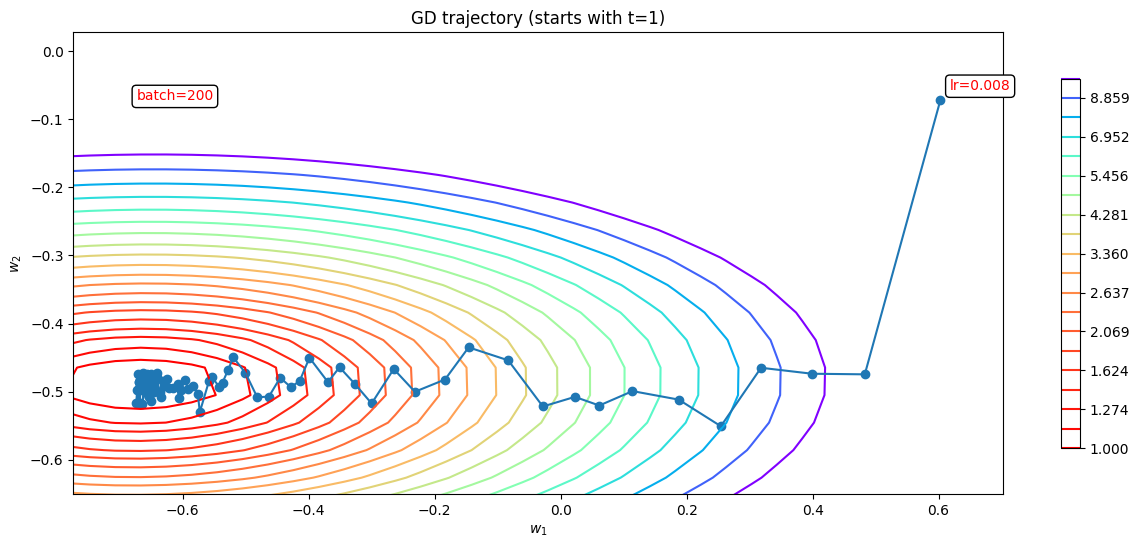

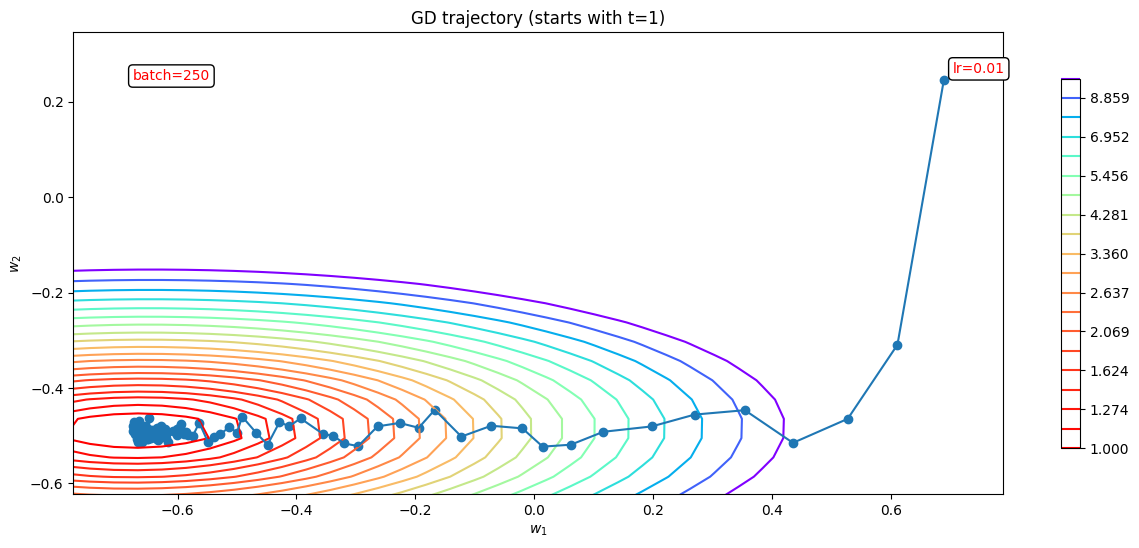

In [12]:
np.random.seed(1412)

for lr, batch, lr_label, batch_label in zip([0.001, 0.002, 0.005, 0.006, 0.008, 0.01],
                                            [10, 40, 100, 150, 200, 250],
                                            ['lr=0.001', 'lr=0.002', 'lr=0.005', 'lr=0.006', 'lr=0.008', 'lr=0.01'],
                                            ['batch=10', 'batch=40', 'batch=100', 'batch=150', 'batch=200', 'batch=250']):
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.005, 40, 100), X, y, loss, lr_label, batch_label)

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [13]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    history = [w_init]

    for i in range(n_iterations):

        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)

        batch = X[batch_indices]
        y_batch = y[batch_indices]

        if i == 0: w = w_init

        w = w - lr * ((1 / (1 + i)) ** p) * loss.calc_grad(batch, y_batch, w)
        history.append(w)

    return history

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

Для всех значений `p` характерен крутой спуск вниз при `t` $= 1$ и резкий подъем вверх при `t` $= 2$.

Заметим, что чем больше `p`, тем более гладкой становится линия траектории ближе к центру.

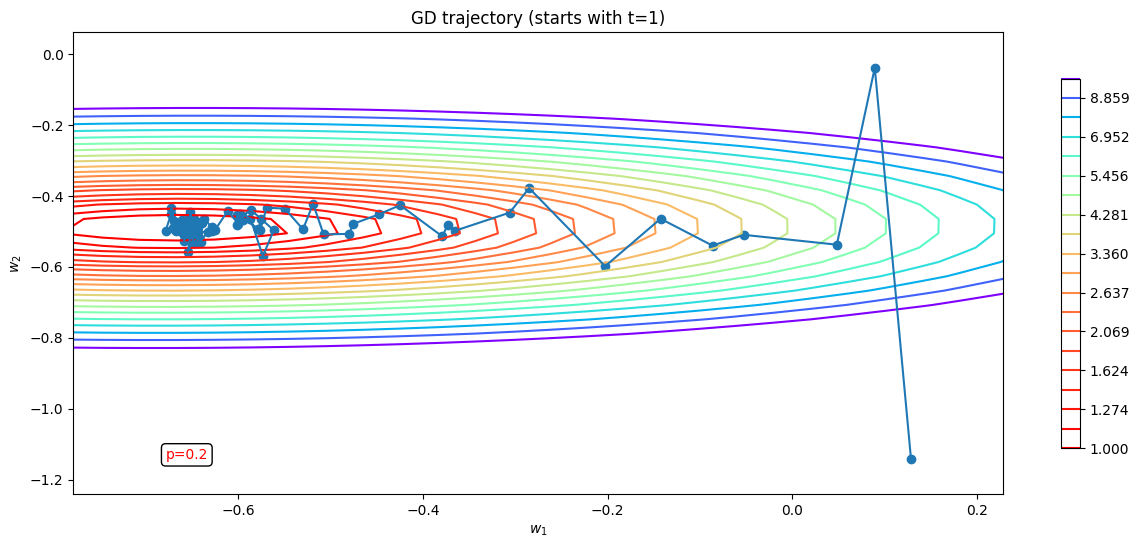

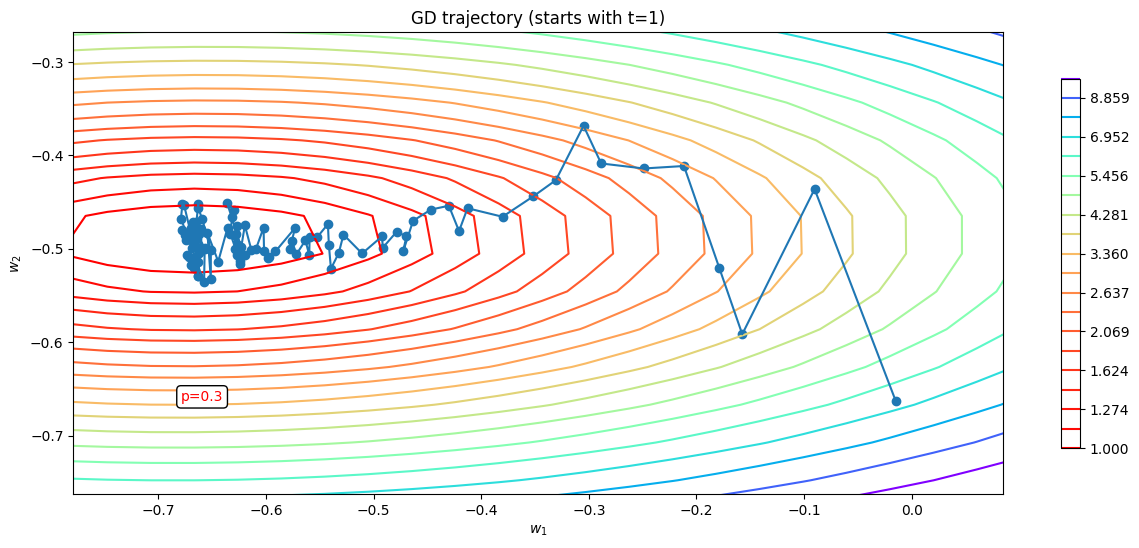

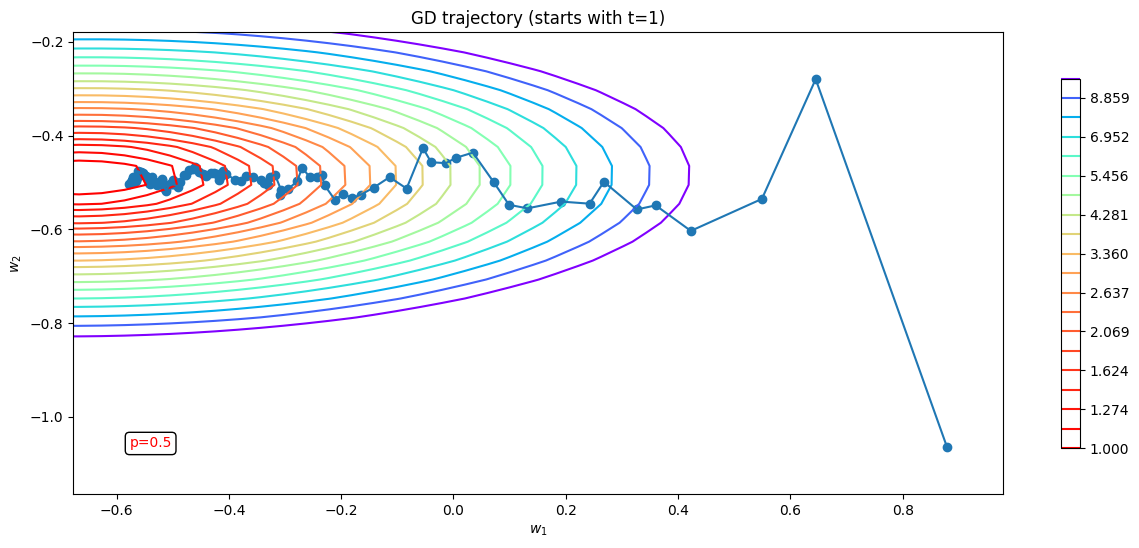

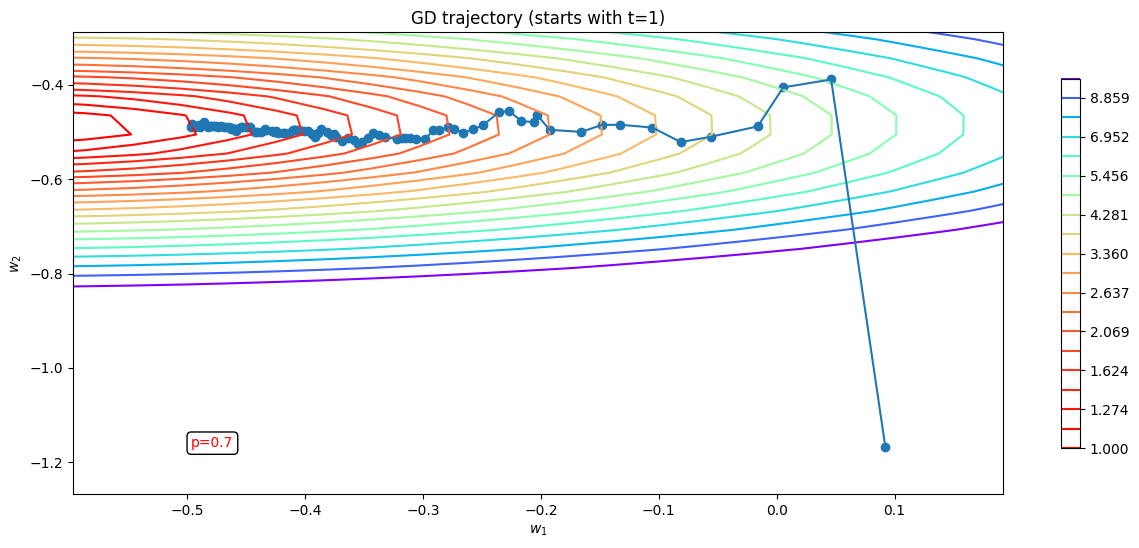

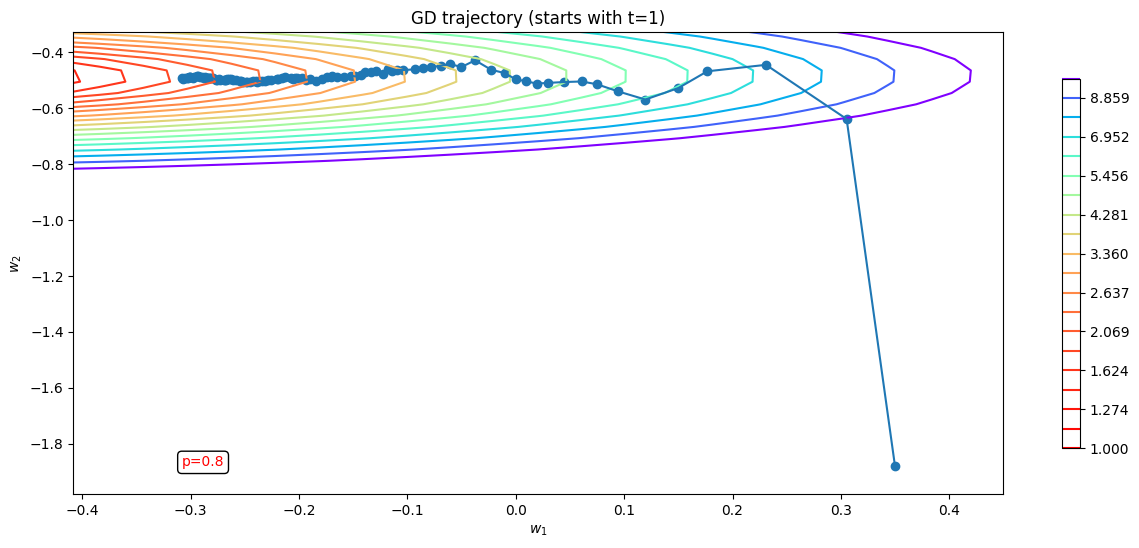

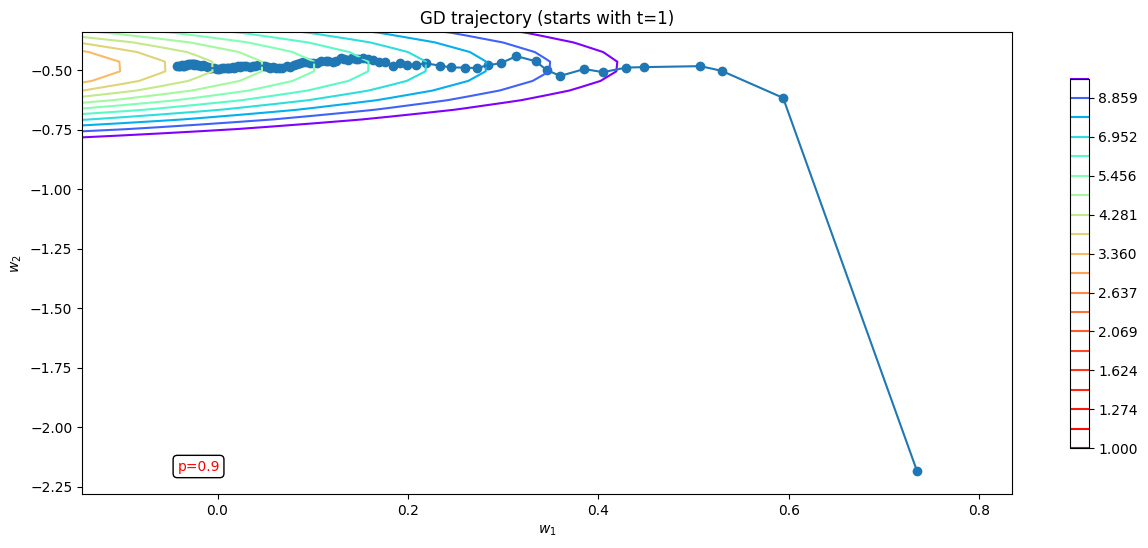

In [14]:
np.random.seed(1723)

for p, p_label in zip([0.2, 0.3, 0.5, 0.7, 0.8, 0.9],
                      ['p=0.2', 'p=0.3', 'p=0.5', 'p=0.7', 'p=0.8', 'p=0.9']):
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100), X, y, loss, p_lbl=p_label)

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

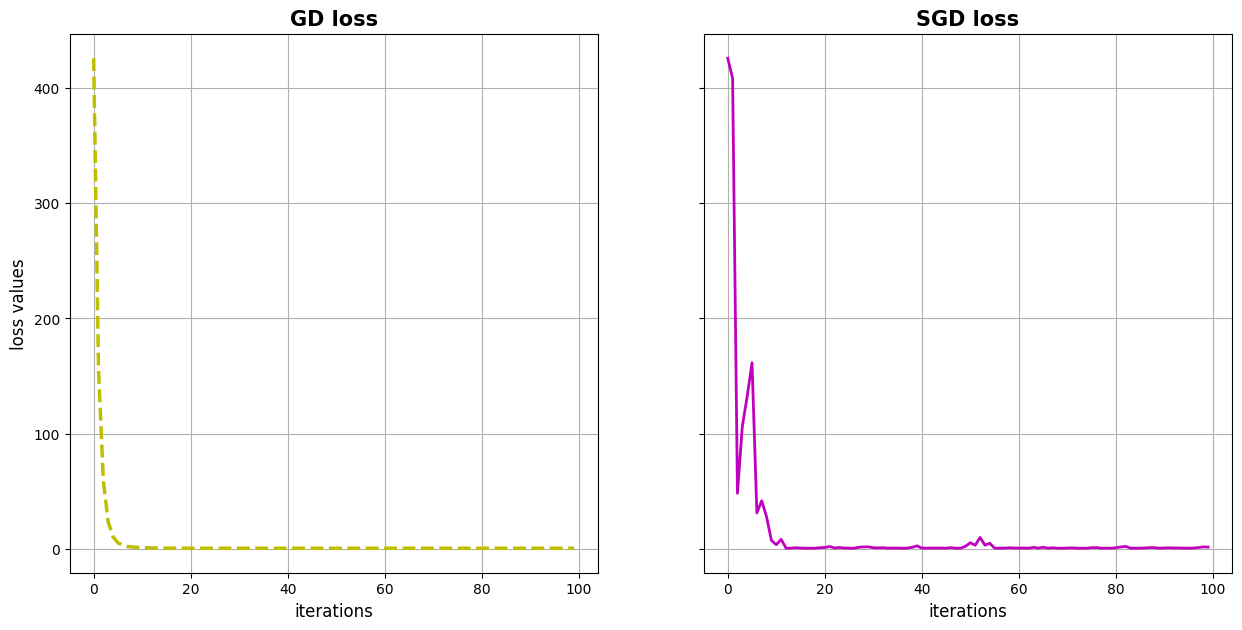

In [15]:
np.random.seed(1756)

fig, (GD, SGD) = plt.subplots(ncols=2, figsize=(15, 7), sharey=True)

w_GD = gradient_descent(w_init, X, y, loss, 0.01, 100)
loss_GD = [loss.calc_loss(X, y, w_GD[i]) for i in range(100)]
GD.plot(range(100), loss_GD, '--y', linewidth=2.5)
GD.grid(True)
GD.set_ylabel('loss values', fontsize=12)
GD.set_xlabel('iterations', fontsize=12)
GD.set_title('GD loss', fontsize=15, fontweight='bold')

w_SGD = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0, 100)
loss_SGD = [loss.calc_loss(X, y, w_SGD[i]) for i in range(100)]
SGD.plot(range(100), loss_SGD, 'm', linewidth=2)
SGD.grid(True)
SGD.set_xlabel('iterations', fontsize=12)
SGD.set_title('SGD loss', fontsize=15, fontweight='bold')

plt.show()

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [16]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)

        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.random.randint(10000, size=X.shape[1])
        w_list = gradient_descent(w_init, X, y, self.loss, self.lr, 100)
        self.w = w_list[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"

        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [17]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [18]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"]
)
X_raw = X_raw[~X_raw[25].isna()].reset_index(drop=True)
X_raw.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0


In [19]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

*Заполним пропуски в категориальных переменных*

In [20]:
from sklearn.impute import SimpleImputer
freq_replacer = SimpleImputer(strategy='most_frequent')

object_mask = (X_raw.dtypes == 'object').values

X_raw_real = X_raw[X_raw.columns[~object_mask]]
X_raw_cat = X_raw[X_raw.columns[object_mask]]
X_raw_cat_no_miss = pd.DataFrame(data=freq_replacer.fit_transform(X_raw_cat),
                                 columns=X_raw_cat.columns)

X_raw = pd.concat([X_raw_real, X_raw_cat_no_miss], axis=1)

*Закодируем категориальные перeменные*

In [21]:
X_raw = pd.get_dummies(X_raw, columns=X_raw.columns[15:], drop_first=True)

*Разделим датасет на обучающую и тестовую выборку*

In [22]:
from sklearn.model_selection import train_test_split

np.random.seed(123456789)

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)

*Заполним пропуски в вещественных переменных*

In [23]:
median_replacer = SimpleImputer(strategy='median')

# train
X_train_real = X_train.iloc[:, :15]
X_train_real_no_miss = pd.DataFrame(data=median_replacer.fit_transform(X_train_real),
                                    columns=X_train_real.columns,
                                    index=X_train.index)

X_train_cat = X_train.iloc[:, 15:]

X_train = pd.concat([X_train_real_no_miss, X_train_cat], axis=1)

# test
X_test_real = X_test.iloc[:, :15]
X_test_real_no_miss = pd.DataFrame(data=median_replacer.transform(X_test_real),
                                    columns=X_test_real.columns,
                                    index=X_test.index)

X_test_cat = X_test.iloc[:, 15:]

X_test = pd.concat([X_test_real_no_miss, X_test_cat], axis=1)

In [24]:
X_train.isna().any().any()

False

In [25]:
X_test.isna().any().any()

False

*Нормализуем вещественные признаки*

In [26]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler()

X_train_transformed = pd.DataFrame(std_scaler.fit_transform(X_train.iloc[:, :15]),
                                   columns=X_train.columns[:15],
                                   index=X_train.index)
X_train = pd.concat([X_train_transformed, X_train.iloc[:, 15:]], axis=1)

X_test_transformed = pd.DataFrame(std_scaler.transform(X_test.iloc[:, :15]),
                                  columns=X_test.columns[:15],
                                  index=X_test.index)
X_test = pd.concat([X_test_transformed, X_test.iloc[:, 15:]], axis=1)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [27]:
np.random.seed(4325)
lin_reg = linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [28]:
from sklearn.metrics import mean_squared_error

RMSE_train_MSELoss = mean_squared_error(y_train, lin_reg.predict(X_train))
RMSE_test_MSELoss = mean_squared_error(y_test, lin_reg.predict(X_test))

print(f'RMSE Train: {RMSE_train_MSELoss:,.2f}',
      f'\nRMSE Test: {RMSE_test_MSELoss:,.2f}')

RMSE Train: 7,991,101.08 
RMSE Test: 14,893,107.46


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [29]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        norm = np.linalg.norm(X @ w - y)
        norm_w = np.linalg.norm(w[-2:])
        return (1 / n_objects) * (norm ** 2) + self.coef * (norm_w ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        w[-1] = 0
        return (2 / n_objects) * X.T @ (X @ w - y) + 2 * self.coef * w


Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [30]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [31]:
np.random.seed(4325)
lin_reg = linear_regression.fit(X_train, y_train)

RMSE_train_MSEL2Loss = mean_squared_error(y_train, lin_reg.predict(X_train))
RMSE_test_MSEL2Loss = mean_squared_error(y_test, lin_reg.predict(X_test))

print(f'RMSE Train: {RMSE_train_MSEL2Loss:,.2f}',
      f'\nRMSE Test: {RMSE_test_MSEL2Loss:,.2f}')

RMSE Train: 7,315,789.84 
RMSE Test: 9,810,378.71


In [32]:
print(f'Разница между MSELoss и MSEL2Loss для train: {RMSE_train_MSELoss - RMSE_train_MSEL2Loss:,.2f}',
      f'\nРазница между MSELoss и MSEL2Loss для test: {RMSE_test_MSELoss - RMSE_test_MSEL2Loss:,.2f}')

Разница между MSELoss и MSEL2Loss для train: 675,311.24 
Разница между MSELoss и MSEL2Loss для test: 5,082,728.76


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [33]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        deviat = X @ w - y

        Huber = lambda x: 0.5 * (x ** 2) if np.absolute(x) < self.eps else self.eps * (np.absolute(x) - 0.5 * self.eps)

        Huber_deviat = np.vectorize(Huber)
        deviat = Huber_deviat(deviat)

        return (1 / n_objects) * np.sum(deviat)


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        deviat = X @ w - y
        grad = np.zeros(X.shape[1])

        Huber_deriv = lambda x: x if np.absolute(x) < self.eps else self.eps * np.sign(x)

        Huber_deriv_deviat = np.vectorize(Huber_deriv)
        deviat = Huber_deriv_deviat(deviat)
        deviat.shape = (deviat.shape[0], 1)
        X = X * deviat

        return (1 / n_objects) * np.sum(X, axis=0)

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [34]:
np.random.seed(4325)

linear_regression = LinearRegression(HuberLoss(16100))
lin_reg = linear_regression.fit(X_train, y_train)

RMSE_train_HuberLoss = mean_squared_error(y_train, lin_reg.predict(X_train))
RMSE_test_HuberLoss = mean_squared_error(y_test, lin_reg.predict(X_test))

print(f'RMSE Train: {RMSE_train_HuberLoss:,.2f}',
      f'\nRMSE Test: {RMSE_test_HuberLoss:,.2f}')

RMSE Train: 11,483,339.02 
RMSE Test: 19,870,830.85


In [35]:
print(f'Разница между MSELoss и MSEHuberLoss для train: {RMSE_train_MSELoss - RMSE_train_HuberLoss:,.2f}',
      f'\nРазница между MSELoss и MSEHuberLoss для test: {RMSE_test_MSELoss - RMSE_test_HuberLoss:,.2f}')

Разница между MSELoss и MSEHuberLoss для train: -3,492,237.94 
Разница между MSELoss и MSEHuberLoss для test: -4,977,723.38


### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [36]:
def simulated_annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss,
                        temp_init: int = 100, delta: float = 0.1) -> List[np.ndarray]:
    current_temp = temp_init
    old_w = w_init
    history = []

    while current_temp > 0:
        new_w = old_w + np.random.standard_t(3, size=old_w.size)
        difference = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, old_w)

        if difference < 0:
            old_w = new_w
            history.append(old_w)
        else:
            P = np.exp(-difference / current_temp)
            heads = np.random.binomial(1, P)
            tails = 1 - heads
            old_w = heads * new_w + tails * old_w
            history.append(old_w)

        current_temp -= delta

    return history

In [37]:
np.random.seed(1337)

n_features = 2
n_objects = 300

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

In [38]:
w_GD_list = gradient_descent(w_init, X, y, MSELoss(), 0.01, 100)
print(f'Финальный GD лосс: {MSELoss().calc_loss(X, y, w_list[-1]):.2f}')

Финальный GD лосс: 0.87


In [39]:
np.random.seed(1337)

w_SA_list = simulated_annealing(w_init, X, y, MSELoss(), temp_init=20, delta=0.01)
print(f'Финальный SA лосс: {MSELoss().calc_loss(X, y, w_SA_list[-1]):.2f}')

Финальный SA лосс: 0.89


**Оценка: 10 / 10**

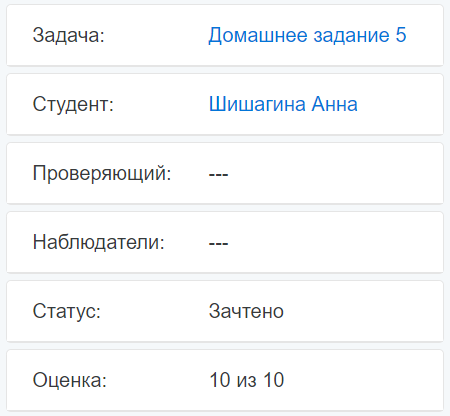